In [2]:
!pip install hyperspy

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.7 MB/s  0:00:00
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ------ --------------------------------- 0.8/5.0 MB 4.8 MB/s eta 0:00:01
   ------------ --------------------------- 1.6/5.0 MB 4.7 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.0 MB 4.7 MB/s eta 0:00:01
   --------------------------- ------------ 3.4/5.0 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 4.2/5.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 4.4 MB/s  0:00:01
   ---------------------------------------- 0.0/792.1 kB ? eta -:--:--
   ---------------------------------------- 792.1/792.1 kB 5.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------- --------------

In [20]:
import cv2
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data
import time
import os
from PIL import Image
import atomai as aoi

%matplotlib inline

In [45]:
torch.manual_seed(0)

# Load and prepare data

In [46]:
images_dir = 'C:\\Users\\jcruanes\\Desktop\\Images\\images'
labels_dir = 'C:\\Users\\jcruanes\\Desktop\\Images\\labels'

In [47]:
# función que normaliza min-max
def normalize(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    norm_matrix = (matrix - min_val) / (max_val - min_val)
    return norm_matrix

In [48]:
dataset_images = []
dataset_labels = []

for n_image, n_label in zip(os.listdir(images_dir),os.listdir(labels_dir)):
    image = Image.open(images_dir + '/' + n_image)
    label = Image.open(labels_dir + '/' + n_label)
    image = np.array(image)[:, :, 0]
    label = np.array(label)
    print (image.shape, label.shape)
    dataset_images.append(normalize(image))
    dataset_labels.append(normalize(label))

(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (

In [49]:
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

In [50]:
ratio_test = 0.2
n_test = int(ratio_test * len(dataset_images))

index = torch.randperm(len(dataset_images)).tolist()
index_test = index[:n_test]
index_train = index[n_test:]

In [51]:
dataset_images_train = dataset_images[index_train]
dataset_images_test = dataset_images[index_test]
dataset_labels_train = dataset_labels[index_train]
dataset_labels_test = dataset_labels[index_test]

# Train model

c:\Users\jcruanes\.conda\envs\HackathonNew\lib\site-packages\atomai\trainers\trainer.py:667: UserWarning: No GPU found. The training can be EXTREMELY slow
  warnings.warn(
c:\Users\jcruanes\.conda\envs\HackathonNew\lib\site-packages\atomai\utils\preproc.py:54: UserWarning: Adding a channel dimension of 1 to training images
  warnings.warn(
c:\Users\jcruanes\.conda\envs\HackathonNew\lib\site-packages\atomai\utils\preproc.py:59: UserWarning: Adding a channel dimension of 1 to test images
  warnings.warn(
c:\Users\jcruanes\.conda\envs\HackathonNew\lib\site-packages\atomai\utils\preproc.py:64: UserWarning: Adding a channel dimension of 1 to training labels
  warnings.warn(
c:\Users\jcruanes\.conda\envs\HackathonNew\lib\site-packages\atomai\utils\preproc.py:69: UserWarning: Adding a channel dimension of 1 to test labels
  warnings.warn(


(80, 32, 32) (80, 32, 32)
Epoch 1/100 ... Training loss: 0.6537 ... Test loss: 0.6757 ... Train Accuracy: 0.4016 ... Test Accuracy: 0.3088 ... GPU memory usage: N/A / N/A
Epoch 100/100 ... Training loss: 0.0803 ... Test loss: 0.0955 ... Train Accuracy: 0.9794 ... Test Accuracy: 0.9624 ... GPU memory usage: N/A / N/A
Model (final state) evaluation loss: 0.0955
Model (final state) accuracy: 0.9624
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.1152
Model (final state) accuracy: 0.9562
Plotting training history


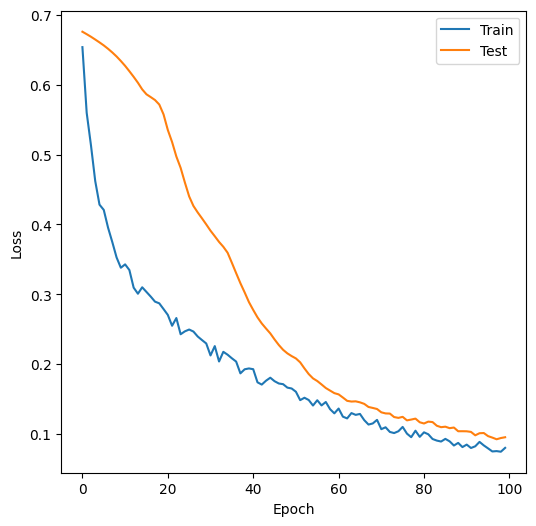

In [63]:
name_model = 'model.pt'

# Initialize model
model = aoi.models.Segmentor(nb_classes=1)

print(dataset_images_train.shape, dataset_labels_train.shape)
# Train
model.fit(dataset_images_train, dataset_labels_train, dataset_images_test, dataset_labels_test, training_cycles=100, compute_accuracy=True, swa=True, batch_size=20)

# Save
torch.save(model, name_model)

# Test model

In [54]:
!pip install PyQt5

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.9 MB 3.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/6.9 MB 3.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.1/6.9 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 3.1/6.9 MB 3.8 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/6.9 MB 3.9 MB/s eta 0:00:01
   --------------------------- ------------ 4.7/6.9 MB 3.8 MB/s eta 0:00:01
   -------------------------------- ------- 5.5/6.9 MB 3.9 MB/s eta 0:00:01
   ------------------------------------ --- 6.3/6.9 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 3.9 MB/s  0:00:01
   ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
    --------------------------------------- 0.8/50.1 MB 3.3 MB/s eta 0:00:15
   - -------------------------------------- 1.6/50.1 MB 3.8 MB/s eta 0:00:13
   - ---------------------

Batch 1/1
1 image was decoded in approximately 0.0051 seconds


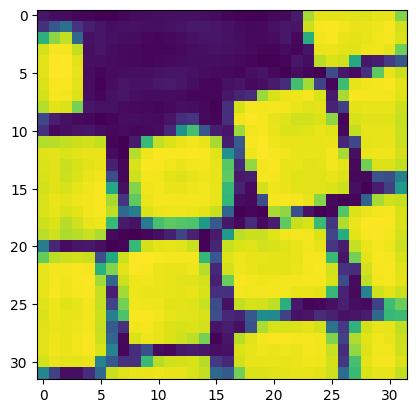

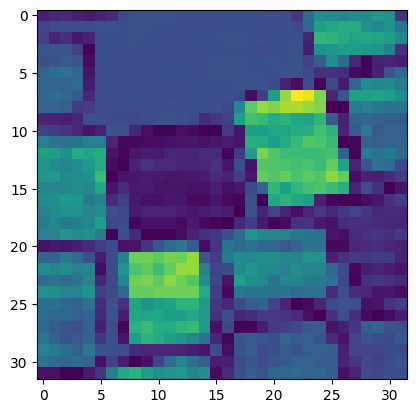

{0: array([[15.91946309, 21.10067114,  0.        ],
       [14.18181818, 12.01515152,  0.        ],
       [24.6484375 ,  6.8203125 ,  0.        ]])}


In [67]:
%matplotlib inline
n = 23

pred, peaks = model.predict(dataset_images_train[n])
plt.imshow(pred[0])
plt.show()

plt.imshow(dataset_images_train[n])
plt.show()
print(peaks)